# Import des ressources

In [413]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Import de la data

In [414]:
matches = pd.read_csv('matches.csv', index_col=0)
matches

,Date,Heure,Comp,Tour,Jour,Tribune,Résultat,BM,BE,Adversaire,...,PénM,PénT,Buts,Tirs,TC,TC%,B/Tir,B/TC,Saison,Equipe
1,2021-08-07,21:00,Ligue 1,Journée 1,Sam,Extérieur,V,2.0,1.0,Troyes,...,0.0,0.0,2.0,12.0,2.0,16.7,0.17,1.00,2022,ParisSaintGermain
2,2021-08-14,21:00,Ligue 1,Journée 2,Sam,Domicile,V,4.0,2.0,Strasbourg,...,0.0,0.0,3.0,11.0,5.0,45.5,0.27,0.60,2022,ParisSaintGermain
3,2021-08-20,21:00,Ligue 1,Journée 3,Ven,Extérieur,V,4.0,2.0,Brest,...,0.0,0.0,4.0,16.0,8.0,50.0,0.25,0.50,2022,ParisSaintGermain
4,2021-08-29,20:45,Ligue 1,Journée 4,Dim,Extérieur,V,2.0,0.0,Reims,...,0.0,0.0,2.0,12.0,3.0,25.0,0.17,0.67,2022,ParisSaintGermain
5,2021-09-11,17:00,Ligue 1,Journée 5,Sam,Domicile,V,4.0,0.0,Clermont Foot,...,0.0,0.0,4.0,13.0,7.0,53.8,0.31,0.57,2022,ParisSaintGermain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,2021-04-25,15:00,Ligue 1,Journée 34,Dim,Extérieur,D,1.0,5.0,Rennes,...,1.0,1.0,1.0,3.0,0.0,0.0,0.00,NaN,2021,Dijon
35,2021-05-02,15:00,Ligue 1,Journée 35,Dim,Domicile,D,1.0,5.0,Metz,...,0.0,0.0,1.0,10.0,4.0,40.0,0.10,0.25,2021,Dijon
36,2021-05-09,15:00,Ligue 1,Journée 36,Dim,Extérieur,D,0.0,3.0,Angers,...,0.0,0.0,0.0,5.0,1.0,20.0,0.00,0.00,2021,Dijon
37,2021-05-16,21:00,Ligue 1,Journée 37,Dim,Domicile,D,0.0,4.0,Nantes,...,0.0,0.0,0.0,10.0,1.0,10.0,0.00,0.00,2021,Dijon


In [415]:
matches.shape

(1500, 31)

In [416]:
matches.columns

Index(['Date', 'Heure', 'Comp', 'Tour', 'Jour', 'Tribune', 'Résultat', 'BM',
       'BE', 'Adversaire', 'xG', 'xGA', 'Poss', 'Affluence', 'Capitaine',
       'Formation', 'Arbitre', 'Rapport de match', 'Notes', 'Dist', 'CF',
       'PénM', 'PénT', 'Buts', 'Tirs', 'TC', 'TC%', 'B/Tir', 'B/TC', 'Saison',
       'Equipe'],
      dtype='object')

In [417]:
# Nous avons 2 saisons... 20 équipes... 38 matchs

2 * 20 * 38

1520

In [418]:
matches['Equipe'].value_counts()

ParisSaintGermain    75
Brest                75
Bordeaux             75
SaintEtienne         75
Metz                 75
Lorient              75
Angers               75
Montpellier          75
Monaco               75
Reims                75
Lille                75
Nantes               75
Lyon                 75
Lens                 75
Nice                 75
Strasbourg           75
Rennes               75
Marseille            75
Nimes                38
Dijon                38
Troyes               37
ClermontFoot         37
Name: Equipe, dtype: int64

In [419]:
matches.dtypes

Date                 object
Heure                object
Comp                 object
Tour                 object
Jour                 object
Tribune              object
Résultat             object
BM                  float64
BE                  float64
Adversaire           object
xG                  float64
xGA                 float64
Poss                float64
Affluence           float64
Capitaine            object
Formation            object
Arbitre              object
Rapport de match     object
Notes               float64
Dist                float64
CF                  float64
PénM                float64
PénT                float64
Buts                float64
Tirs                float64
TC                  float64
TC%                 float64
B/Tir               float64
B/TC                float64
Saison                int64
Equipe               object
dtype: object

# Simplification
## Suppression de variables

In [420]:
matches.drop(['Notes', 'Comp'], axis=1, inplace=True)
matches.drop(['Affluence'], axis=1, inplace=True) # pas assez de données


## Hour

In [421]:
matches["Heure_fix"] = matches['Heure'].str.replace(":.+", "", regex=True).astype("int")

## Datetime

In [422]:
matches["Date"] = pd.to_datetime(matches['Date'])

## Jour

In [423]:
matches['Day_code'] = matches['Date'].dt.dayofweek

# Variables predict

In [424]:
matches["Target"] = (matches["Résultat"] == "V").astype('int')

In [425]:
matches

,Date,Heure,Tour,Jour,Tribune,Résultat,BM,BE,Adversaire,xG,...,Tirs,TC,TC%,B/Tir,B/TC,Saison,Equipe,Heure_fix,Day_code,Target
1,2021-08-07,21:00,Journée 1,Sam,Extérieur,V,2.0,1.0,Troyes,1.2,...,12.0,2.0,16.7,0.17,1.00,2022,ParisSaintGermain,21,5,1
2,2021-08-14,21:00,Journée 2,Sam,Domicile,V,4.0,2.0,Strasbourg,2.5,...,11.0,5.0,45.5,0.27,0.60,2022,ParisSaintGermain,21,5,1
3,2021-08-20,21:00,Journée 3,Ven,Extérieur,V,4.0,2.0,Brest,1.4,...,16.0,8.0,50.0,0.25,0.50,2022,ParisSaintGermain,21,4,1
4,2021-08-29,20:45,Journée 4,Dim,Extérieur,V,2.0,0.0,Reims,1.2,...,12.0,3.0,25.0,0.17,0.67,2022,ParisSaintGermain,20,6,1
5,2021-09-11,17:00,Journée 5,Sam,Domicile,V,4.0,0.0,Clermont Foot,2.8,...,13.0,7.0,53.8,0.31,0.57,2022,ParisSaintGermain,17,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,2021-04-25,15:00,Journée 34,Dim,Extérieur,D,1.0,5.0,Rennes,1.1,...,3.0,0.0,0.0,0.00,NaN,2021,Dijon,15,6,0
35,2021-05-02,15:00,Journée 35,Dim,Domicile,D,1.0,5.0,Metz,1.0,...,10.0,4.0,40.0,0.10,0.25,2021,Dijon,15,6,0
36,2021-05-09,15:00,Journée 36,Dim,Extérieur,D,0.0,3.0,Angers,0.5,...,5.0,1.0,20.0,0.00,0.00,2021,Dijon,15,6,0
37,2021-05-16,21:00,Journée 37,Dim,Domicile,D,0.0,4.0,Nantes,0.9,...,10.0,1.0,10.0,0.00,0.00,2021,Dijon,21,6,0


## Scaling

In [426]:
matches.columns

Index(['Date', 'Heure', 'Tour', 'Jour', 'Tribune', 'Résultat', 'BM', 'BE',
       'Adversaire', 'xG', 'xGA', 'Poss', 'Capitaine', 'Formation', 'Arbitre',
       'Rapport de match', 'Dist', 'CF', 'PénM', 'PénT', 'Buts', 'Tirs', 'TC',
       'TC%', 'B/Tir', 'B/TC', 'Saison', 'Equipe', 'Heure_fix', 'Day_code',
       'Target'],
      dtype='object')

In [427]:
ohe = OneHotEncoder(sparse=False)
column_category = ['Tribune', 'Adversaire', 'Equipe', 'Arbitre']

cat_enc = ohe.fit_transform(matches[column_category])

df_ohe = pd.DataFrame(cat_enc)

In [428]:
matches[df_ohe.columns.values] = df_ohe

In [429]:
ss = StandardScaler()
# colonne_numerique = ['Heure_fix', 'xG', 'xGA', 'CF', 'PénM', 'PénT', 'Tirs']
colonne_numerique = ['Heure_fix', 'xG', 'xGA']

matches[colonne_numerique] = ss.fit_transform(matches[colonne_numerique])

matches

,Date,Heure,Tour,Jour,Tribune,Résultat,BM,BE,Adversaire,xG,...,65,66,67,68,69,70,71,72,73,74
1,2021-08-07,21:00,Journée 1,Sam,Extérieur,V,2.0,1.0,Troyes,-0.154300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2021-08-14,21:00,Journée 2,Sam,Domicile,V,4.0,2.0,Strasbourg,1.481830,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-08-20,21:00,Journée 3,Ven,Extérieur,V,4.0,2.0,Brest,0.097413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-08-29,20:45,Journée 4,Dim,Extérieur,V,2.0,0.0,Reims,-0.154300,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2021-09-11,17:00,Journée 5,Sam,Domicile,V,4.0,0.0,Clermont Foot,1.859398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,2021-04-25,15:00,Journée 34,Dim,Extérieur,D,1.0,5.0,Rennes,-0.280156,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
35,2021-05-02,15:00,Journée 35,Dim,Domicile,D,1.0,5.0,Metz,-0.406012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,2021-05-09,15:00,Journée 36,Dim,Extérieur,D,0.0,3.0,Angers,-1.035292,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,2021-05-16,21:00,Journée 37,Dim,Domicile,D,0.0,4.0,Nantes,-0.531868,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

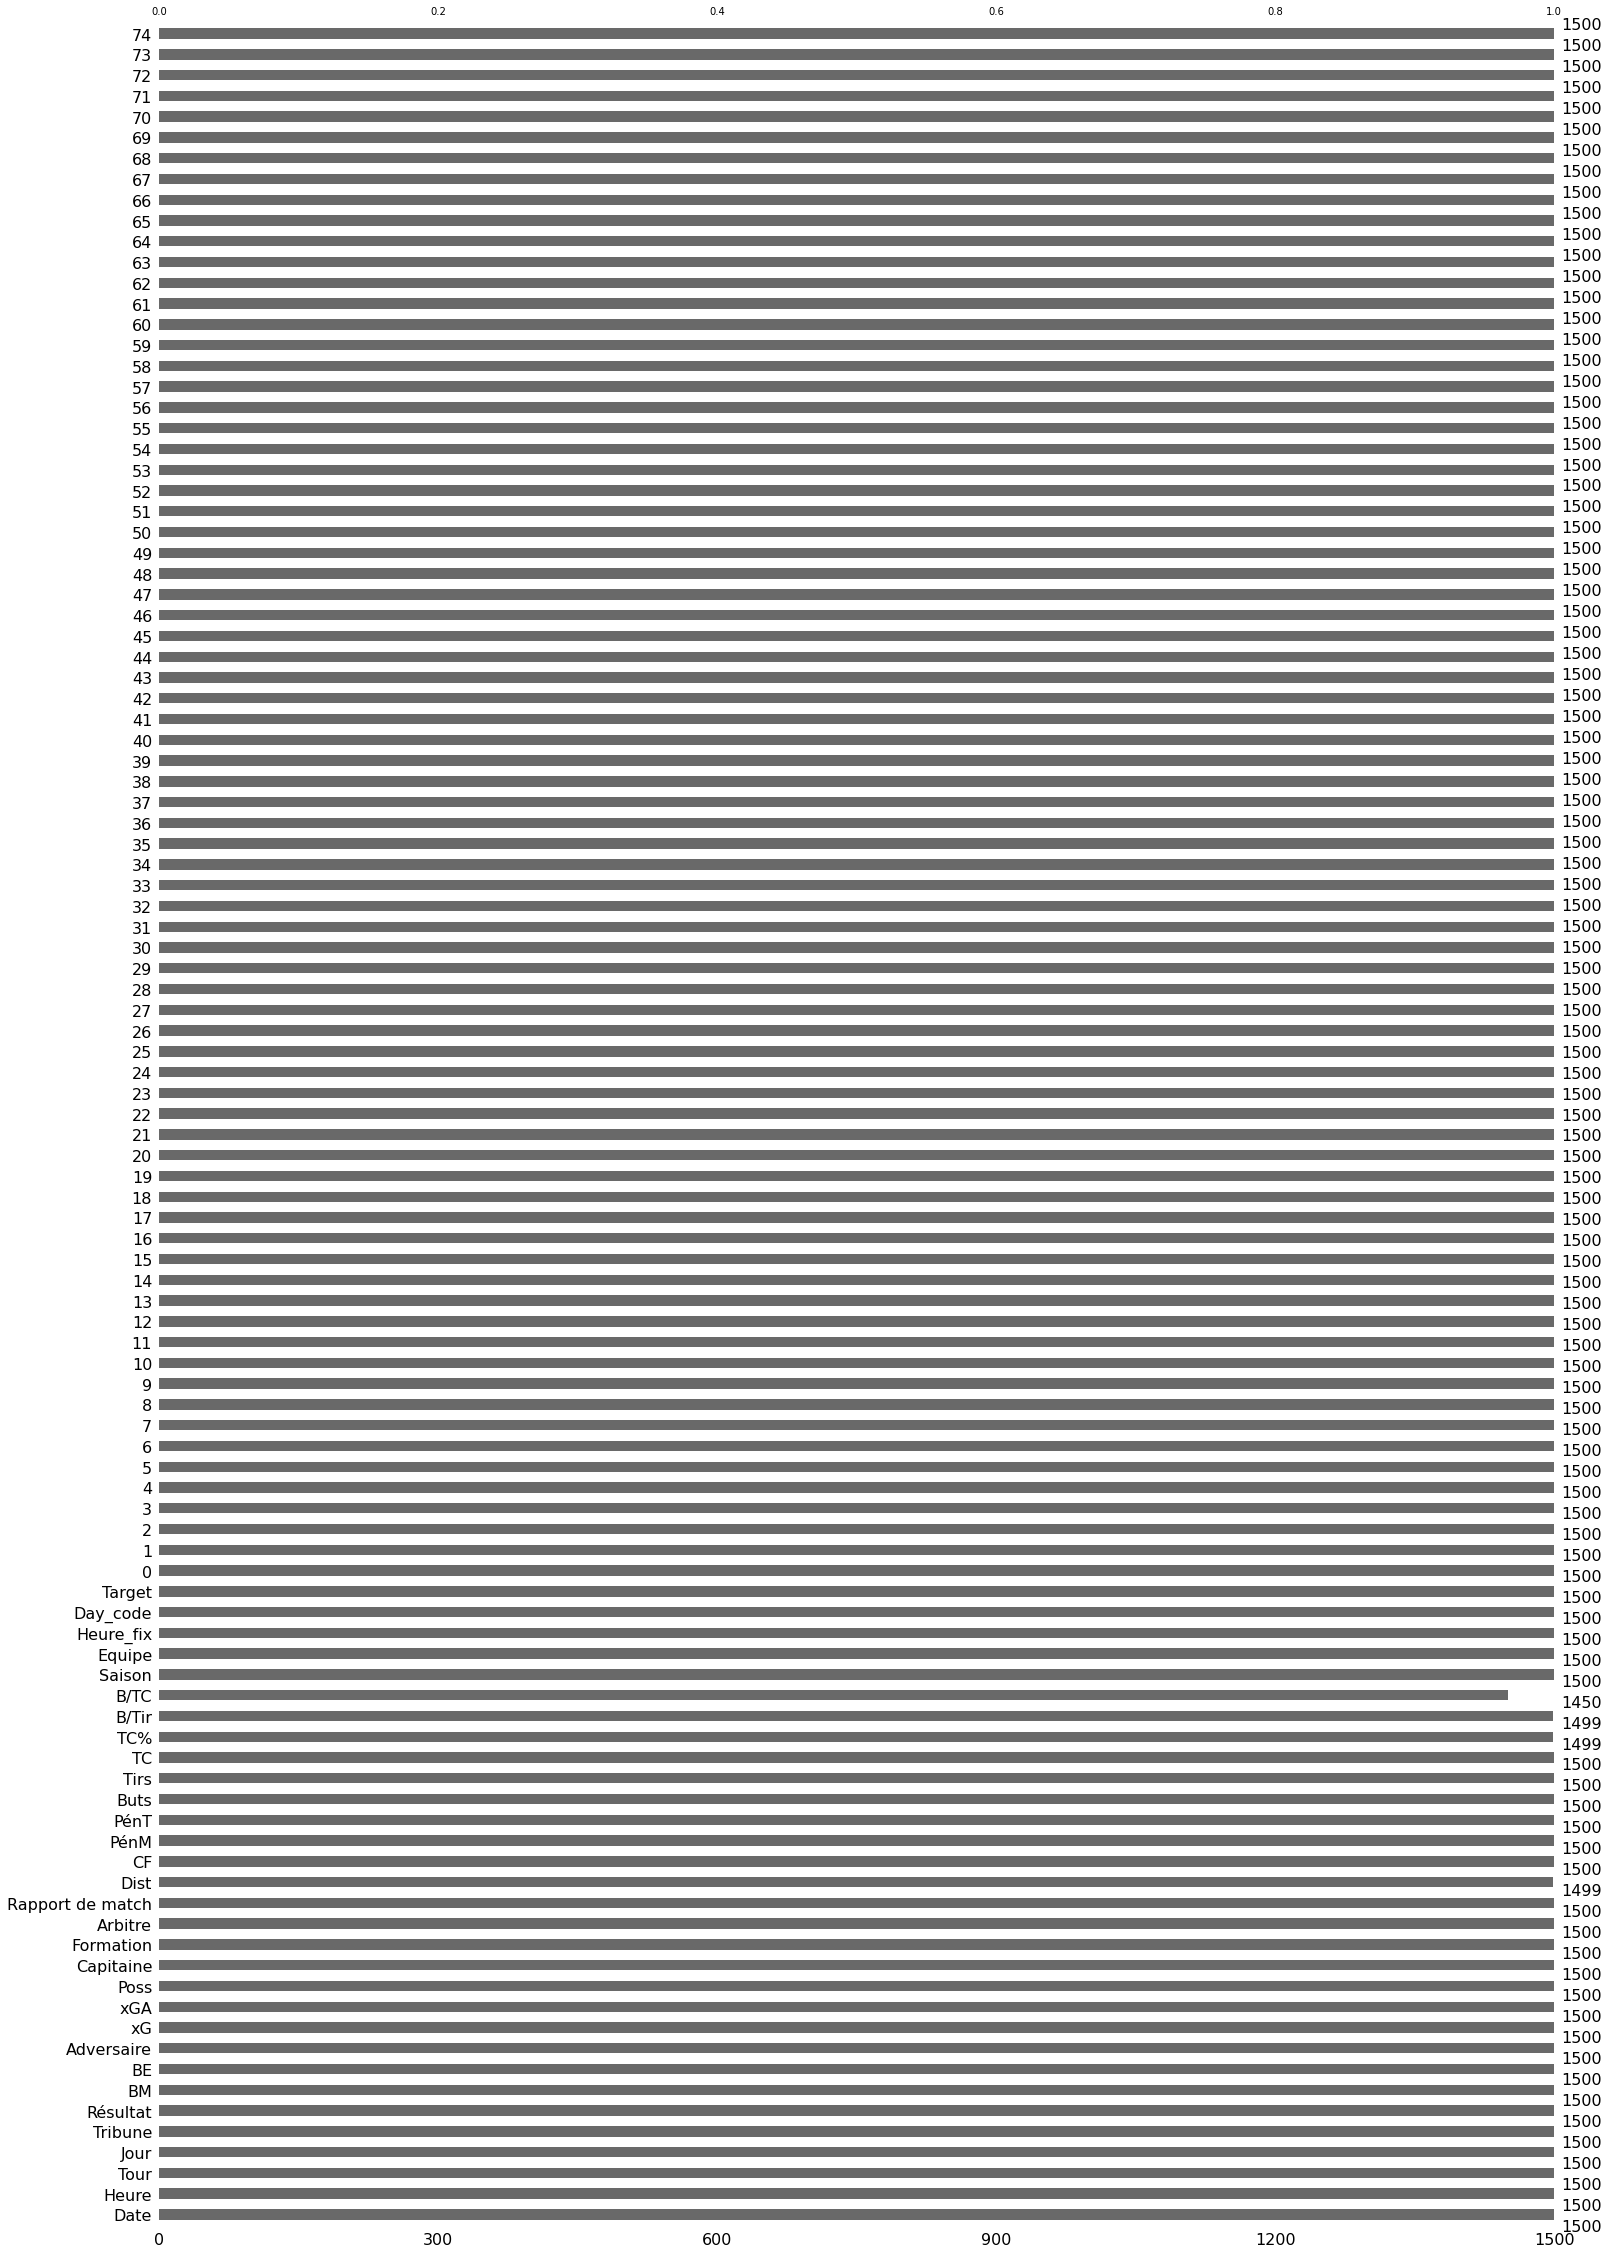

In [430]:
import missingno
missingno.bar(matches)

In [431]:
matches.dropna(inplace=True)

In [432]:
predictors = colonne_numerique + df_ohe.columns.values.tolist()

predictors


['Heure_fix',
 'xG',
 'xGA',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74]

# Train split

In [433]:
X_train, X_test, y_train, y_test = train_test_split(matches.drop(['Target'], axis=1),
                                                    matches["Target"],
                                                    test_size=0.33,
                                                    random_state=0) 

In [434]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

In [435]:
rf.fit(X_train[predictors], y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [436]:
predict = rf.predict(X_test[predictors])

In [437]:
rf.score(X_test[predictors], y_test)

0.7181628392484343

In [438]:
matches['predict'] = rf.predict(matches[predictors])
matches

,Date,Heure,Tour,Jour,Tribune,Résultat,BM,BE,Adversaire,xG,...,66,67,68,69,70,71,72,73,74,predict
1,2021-08-07,21:00,Journée 1,Sam,Extérieur,V,2.0,1.0,Troyes,-0.154300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,2021-08-14,21:00,Journée 2,Sam,Domicile,V,4.0,2.0,Strasbourg,1.481830,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2021-08-20,21:00,Journée 3,Ven,Extérieur,V,4.0,2.0,Brest,0.097413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2021-08-29,20:45,Journée 4,Dim,Extérieur,V,2.0,0.0,Reims,-0.154300,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,2021-09-11,17:00,Journée 5,Sam,Domicile,V,4.0,0.0,Clermont Foot,1.859398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,2021-04-18,15:00,Journée 33,Dim,Domicile,V,2.0,0.0,Nice,-0.028443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
35,2021-05-02,15:00,Journée 35,Dim,Domicile,D,1.0,5.0,Metz,-0.406012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
36,2021-05-09,15:00,Journée 36,Dim,Extérieur,D,0.0,3.0,Angers,-1.035292,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
37,2021-05-16,21:00,Journée 37,Dim,Domicile,D,0.0,4.0,Nantes,-0.531868,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [439]:
pd.crosstab(index=matches['Target'], columns=matches['predict'])

predict,0,1
Target,,
0,825,69
1,200,356


In [440]:
# Victoires non-trouvées
matches[(matches['Target'] == 1) & (matches['predict'] != 1)]

,Date,Heure,Tour,Jour,Tribune,Résultat,BM,BE,Adversaire,xG,...,66,67,68,69,70,71,72,73,74,predict
3,2021-08-20,21:00,Journée 3,Ven,Extérieur,V,4.0,2.0,Brest,0.097413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,2021-09-22,21:00,Journée 7,Mer,Extérieur,V,2.0,1.0,Metz,-0.154300,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
12,2021-10-15,21:00,Journée 10,Ven,Domicile,V,2.0,1.0,Angers,0.726693,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
15,2021-10-29,21:00,Journée 12,Ven,Domicile,V,2.0,1.0,Lille,1.355974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
33,2022-02-11,21:00,Journée 24,Ven,Domicile,V,1.0,0.0,Rennes,-0.406012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,2021-02-24,19:00,Journée 21,Mer,Domicile,V,1.0,0.0,Lorient,-0.154300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
30,2021-03-21,17:05,Journée 30,Dim,Extérieur,V,2.0,1.0,Lille,-0.909436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
11,2020-11-29,17:00,Journée 12,Dim,Extérieur,V,3.0,1.0,Nice,-0.406012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
16,2020-12-23,19:00,Journée 17,Mer,Extérieur,V,3.0,1.0,Nîmes,-0.028443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
